In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# data_path = r'/kaggle/input/home-credit-default-risk'
#Bureau&bureau_balance

bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')

In [2]:
print(bureau.shape)
bureau

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [3]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [4]:
bureau = bureau.drop_duplicates(subset = ['SK_ID_BUREAU'], keep = 'last').reset_index(drop = True)

In [5]:
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [6]:
info = pd.DataFrame(bureau.dtypes, columns=['Dtypes'])
info['Unique'] = bureau.nunique().values
info['NA'] = bureau.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,305811,0
SK_ID_BUREAU,int64,1716428,0
CREDIT_ACTIVE,object,4,0
CREDIT_CURRENCY,object,4,0
DAYS_CREDIT,int64,2923,0
CREDIT_DAY_OVERDUE,int64,942,0
DAYS_CREDIT_ENDDATE,float64,14096,105553
DAYS_ENDDATE_FACT,float64,2917,633653
AMT_CREDIT_MAX_OVERDUE,float64,68251,1124488
CNT_CREDIT_PROLONG,int64,10,0


In [7]:
# na_cols = [col for col in bureau.columns if bureau[col].isna().sum()>len(bureau)/2]
# na_cols

In [8]:
# Below code gives percentage of null in every column
na_percentage = (bureau.isna().sum()/bureau.shape[0])*100

# Below code gives list of columns having more than 60% null
col_to_drop = na_percentage[na_percentage>60].keys()
print(col_to_drop)

bureau = bureau.drop(col_to_drop, axis=1)

Index(['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY'], dtype='object')


In [10]:
info = pd.DataFrame(bureau.dtypes, columns=['Dtypes'])
info['Unique'] = bureau.nunique().values
info['NA'] = bureau.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,305811,0
SK_ID_BUREAU,int64,1716428,0
CREDIT_ACTIVE,object,4,0
CREDIT_CURRENCY,object,4,0
DAYS_CREDIT,int64,2923,0
CREDIT_DAY_OVERDUE,int64,942,0
DAYS_CREDIT_ENDDATE,float64,14096,105553
DAYS_ENDDATE_FACT,float64,2917,633653
CNT_CREDIT_PROLONG,int64,10,0
AMT_CREDIT_SUM,float64,236708,13


In [11]:
bureau.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,100001.000,188866.75,278055.0,367426.00,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5000000.000,5463953.75,5926303.5,6385681.25,6.843457e+06
DAYS_CREDIT,1716428.0,-1.142108e+03,7.951649e+02,-2922.000,-1666.00,-987.0,-474.00,0.000000e+00
CREDIT_DAY_OVERDUE,1716428.0,8.181666e-01,3.654443e+01,0.000,0.00,0.0,0.00,2.792000e+03
DAYS_CREDIT_ENDDATE,1610875.0,5.105174e+02,4.994220e+03,-42060.000,-1138.00,-330.0,474.00,3.119900e+04
DAYS_ENDDATE_FACT,1082775.0,-1.017437e+03,7.140106e+02,-42023.000,-1489.00,-897.0,-425.00,0.000000e+00
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000,0.00,0.0,0.00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000,51300.00,125518.5,315000.00,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4705600.320,0.00,0.0,40153.50,1.701000e+08
AMT_CREDIT_SUM_LIMIT,1124648.0,6.229515e+03,4.503203e+04,-586406.115,0.00,0.0,0.00,4.705600e+06


In [12]:
bureau.dropna(how='any', inplace=True)

In [14]:
bureau.isna().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

In [15]:
bureau.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,652544.0,2.782800e+05,102863.325957,100001.000,1.890480e+05,278282.5,367270.00,4.562550e+05
SK_ID_BUREAU,652544.0,5.912039e+06,532462.089796,5000001.000,5.449234e+06,5903751.5,6373184.25,6.843457e+06
DAYS_CREDIT,652544.0,-1.378915e+03,766.465508,-2922.000,-1.966000e+03,-1250.0,-753.00,-4.000000e+00
CREDIT_DAY_OVERDUE,652544.0,3.594869e-01,26.154376,0.000,0.000000e+00,0.0,0.00,2.792000e+03
DAYS_CREDIT_ENDDATE,652544.0,-5.819048e+02,2780.462938,-42060.000,-1.389000e+03,-722.0,-256.00,3.119800e+04
DAYS_ENDDATE_FACT,652544.0,-9.956362e+02,715.380152,-42023.000,-1.481000e+03,-839.0,-410.00,-2.000000e+00
CNT_CREDIT_PROLONG,652544.0,3.055733e-03,0.061622,0.000,0.000000e+00,0.0,0.00,5.000000e+00
AMT_CREDIT_SUM,652544.0,2.359824e+05,926990.186001,0.000,4.410362e+04,91579.5,225000.00,3.960000e+08
AMT_CREDIT_SUM_DEBT,652544.0,6.664796e+02,59545.920571,-455190.525,0.000000e+00,0.0,0.00,1.867695e+07
AMT_CREDIT_SUM_LIMIT,652544.0,1.307663e+03,19876.789842,-110293.605,0.000000e+00,0.0,0.00,2.250000e+06


C:\Users\agivc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


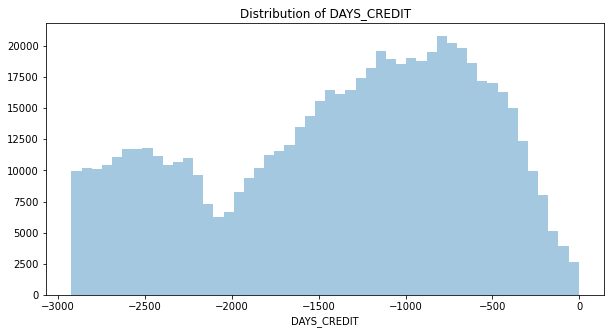

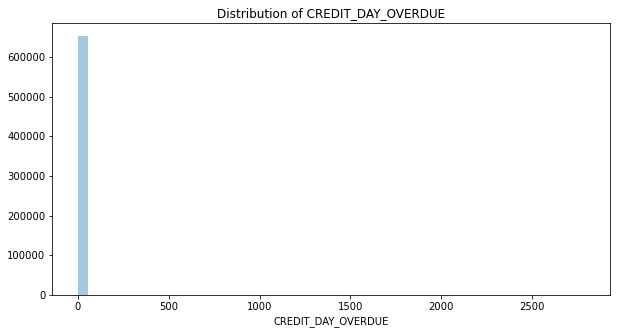

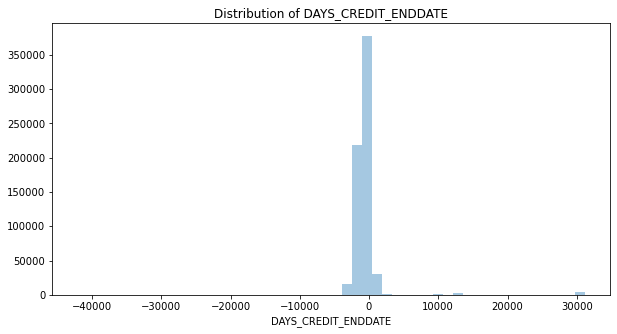

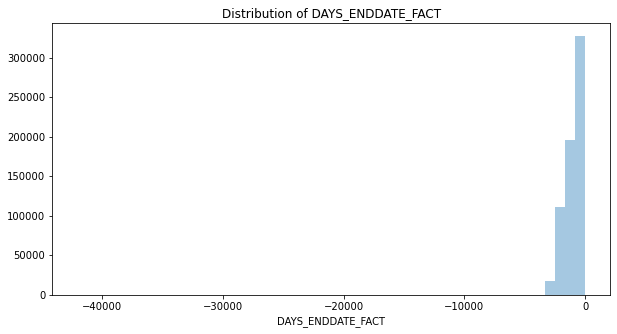

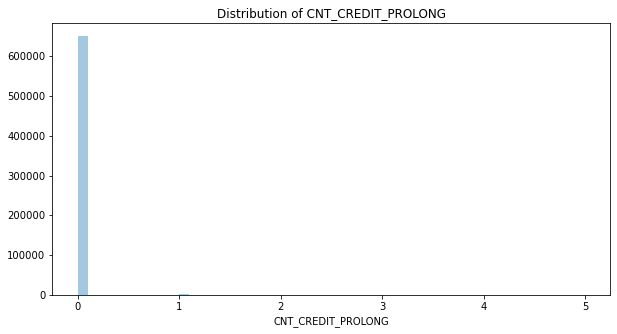

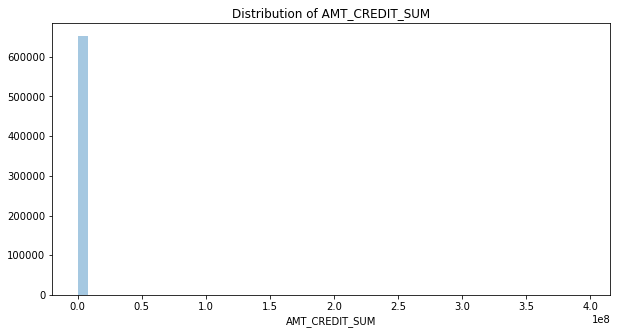

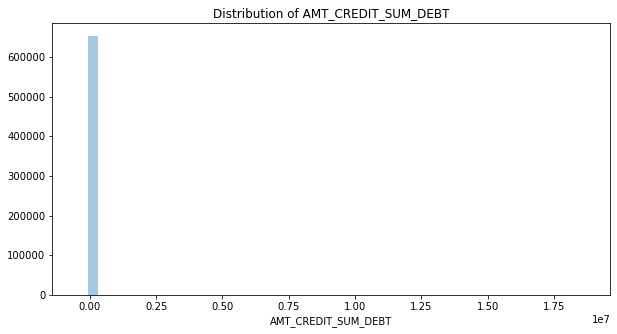

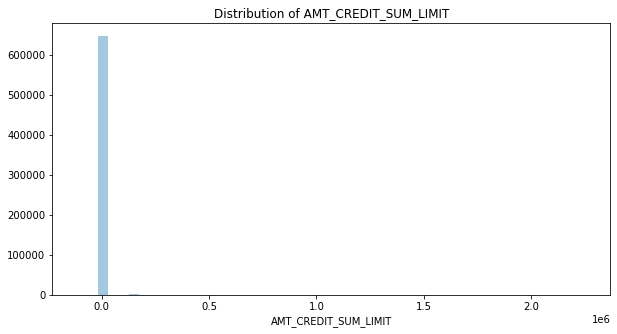

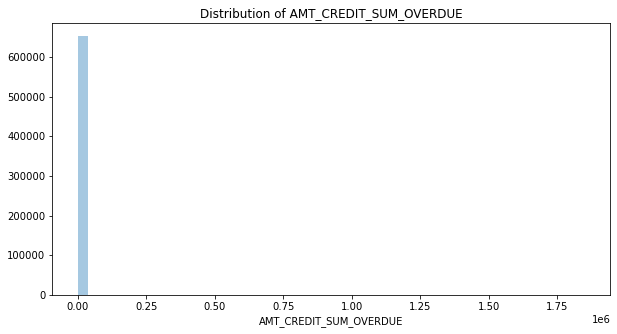

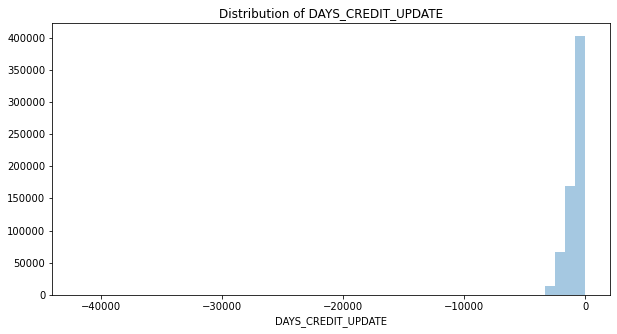

In [16]:
numeric_col = bureau.select_dtypes(exclude='object').columns.to_list()
for feature in numeric_col[2:]:
    fig, ax = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (10, 5))
    sns.distplot(bureau[feature], kde= False)
    ax.set_title("Distribution of " + feature)

In [17]:
print(bureau['CREDIT_DAY_OVERDUE'].value_counts()) #parameter normalize=true
#too many 0 -> drop
bureau.drop(columns = 'CREDIT_DAY_OVERDUE', inplace=True)

0       652402
1703         2
1634         2
1562         2
2195         2
         ...  
2347         1
1325         1
1326         1
1334         1
1724         1
Name: CREDIT_DAY_OVERDUE, Length: 138, dtype: int64


In [18]:
print(bureau['CNT_CREDIT_PROLONG'].value_counts()) #parameter normalize=true
#too many 0 -> drop
bureau.drop(columns = 'CNT_CREDIT_PROLONG', inplace=True)

0    650743
1      1646
2       129
3        16
4         8
5         2
Name: CNT_CREDIT_PROLONG, dtype: int64


In [19]:
print(bureau['AMT_CREDIT_SUM_DEBT'].value_counts()) #parameter normalize=true
#too many 0 -> drop
bureau.drop(columns = 'AMT_CREDIT_SUM_DEBT', inplace=True)

 0.000         649383
-450.000           53
 67500.000         29
 90000.000         23
 157500.000        22
                ...  
-5.220              1
 358617.105         1
 5212.125           1
 5211.000           1
 2004.165           1
Name: AMT_CREDIT_SUM_DEBT, Length: 2658, dtype: int64


In [20]:
print(bureau['AMT_CREDIT_SUM_LIMIT'].value_counts()) #parameter normalize=true
#too many 0 -> drop
bureau.drop(columns = 'AMT_CREDIT_SUM_LIMIT', inplace=True)

0.000         647320
135000.000       811
90000.000        297
45000.000        219
67500.000        216
               ...  
91643.760          1
135041.400         1
62825.085          1
135133.650         1
148973.580         1
Name: AMT_CREDIT_SUM_LIMIT, Length: 3016, dtype: int64


In [21]:
print(bureau['AMT_CREDIT_SUM_OVERDUE'].value_counts()) #parameter normalize=true
#too many 0 -> drop
bureau.drop(columns = 'AMT_CREDIT_SUM_OVERDUE', inplace=True)

0.0      652443
4.5          11
54.0          5
94.5          3
9.0           3
          ...  
144.0         1
58.5          1
229.5         1
72.0          1
243.0         1
Name: AMT_CREDIT_SUM_OVERDUE, Length: 61, dtype: int64


['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


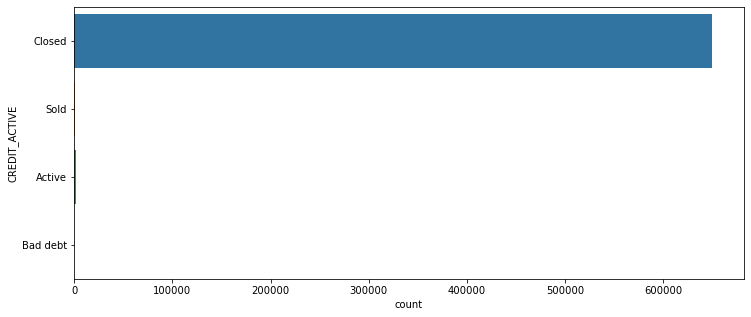

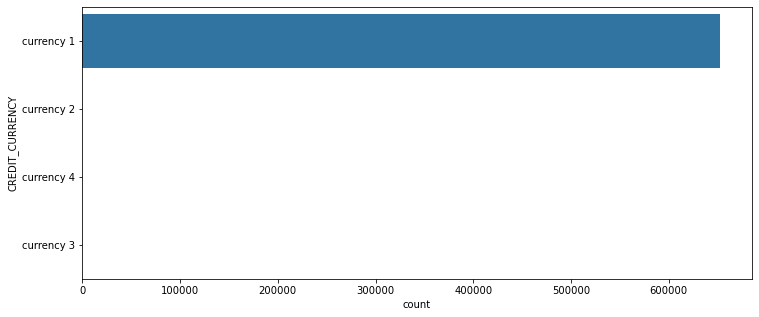

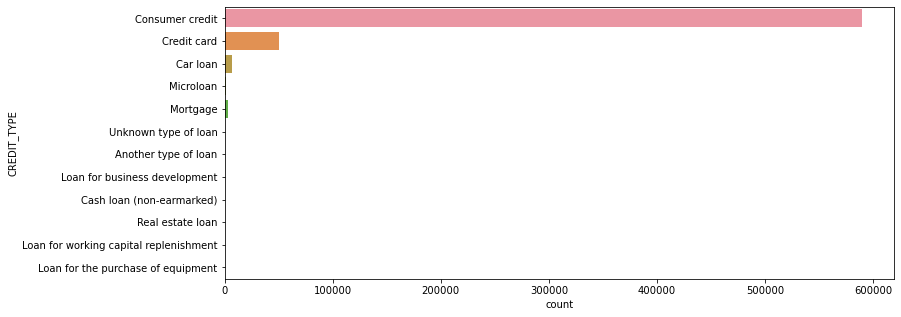

In [22]:
obj_col = bureau.select_dtypes(['object']).columns.to_list()
print(obj_col)
for feature in obj_col:
    plt.figure(figsize=(12,5))
    sns.countplot(y = bureau[feature])

In [23]:
bureau.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,652544.0,2.782800e+05,102863.325957,100001.0,1.890480e+05,278282.5,367270.00,456255.0
SK_ID_BUREAU,652544.0,5.912039e+06,532462.089796,5000001.0,5.449234e+06,5903751.5,6373184.25,6843457.0
DAYS_CREDIT,652544.0,-1.378915e+03,766.465508,-2922.0,-1.966000e+03,-1250.0,-753.00,-4.0
DAYS_CREDIT_ENDDATE,652544.0,-5.819048e+02,2780.462938,-42060.0,-1.389000e+03,-722.0,-256.00,31198.0
DAYS_ENDDATE_FACT,652544.0,-9.956362e+02,715.380152,-42023.0,-1.481000e+03,-839.0,-410.00,-2.0
AMT_CREDIT_SUM,652544.0,2.359824e+05,926990.186001,0.0,4.410362e+04,91579.5,225000.00,396000000.0
DAYS_CREDIT_UPDATE,652544.0,-8.346247e+02,787.930219,-41947.0,-1.116000e+03,-692.0,-325.00,0.0


In [25]:
print(bureau_balance.shape)
bureau_balance

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [26]:
bureau_balance = bureau_balance.drop_duplicates(subset = ['SK_ID_BUREAU'], keep = 'last').reset_index(drop = True)

In [27]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817395 entries, 0 to 817394
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SK_ID_BUREAU    817395 non-null  int64 
 1   MONTHS_BALANCE  817395 non-null  int64 
 2   STATUS          817395 non-null  object
dtypes: int64(2), object(1)
memory usage: 18.7+ MB


['STATUS']


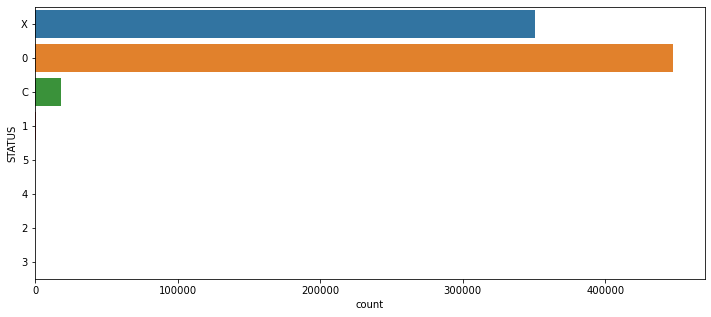

In [28]:
obj_col = bureau_balance.select_dtypes(['object']).columns.to_list()
print(obj_col)
for feature in obj_col:
    plt.figure(figsize=(12,5))
    sns.countplot(y = bureau_balance[feature])

In [29]:
bureau_balance.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [30]:
joinbureau = bureau.merge(bureau_balance, how = "inner", on = "SK_ID_BUREAU")
joinbureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,380361,5715451,Closed,currency 1,-917,-187.0,-759.0,74439.0,Consumer credit,-748,-30,X
1,380361,5715452,Closed,currency 1,-993,31039.0,-831.0,315000.0,Credit card,-818,-32,X
2,380361,5715453,Closed,currency 1,-1146,681.0,-780.0,2025000.0,Consumer credit,-769,-37,X
3,380361,5715454,Closed,currency 1,-1622,-1074.0,-1073.0,540000.0,Consumer credit,-1006,-53,0
4,380361,5715455,Closed,currency 1,-2631,-804.0,-1096.0,2205000.0,Car loan,-944,-86,X
...,...,...,...,...,...,...,...,...,...,...,...,...
272467,435426,5053673,Closed,currency 1,-1248,-882.0,-1004.0,225000.0,Consumer credit,-693,-40,X
272468,435426,5053678,Closed,currency 1,-1147,-416.0,-849.0,205488.0,Consumer credit,-835,-37,0
272469,377669,5053682,Closed,currency 1,-2215,-1843.0,-1653.0,58027.5,Consumer credit,-1642,-72,X
272470,363575,5053740,Closed,currency 1,-1234,-503.0,-502.0,900000.0,Consumer credit,-461,-40,X


In [31]:
joinbureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272472 entries, 0 to 272471
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           272472 non-null  int64  
 1   SK_ID_BUREAU         272472 non-null  int64  
 2   CREDIT_ACTIVE        272472 non-null  object 
 3   CREDIT_CURRENCY      272472 non-null  object 
 4   DAYS_CREDIT          272472 non-null  int64  
 5   DAYS_CREDIT_ENDDATE  272472 non-null  float64
 6   DAYS_ENDDATE_FACT    272472 non-null  float64
 7   AMT_CREDIT_SUM       272472 non-null  float64
 8   CREDIT_TYPE          272472 non-null  object 
 9   DAYS_CREDIT_UPDATE   272472 non-null  int64  
 10  MONTHS_BALANCE       272472 non-null  int64  
 11  STATUS               272472 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 27.0+ MB


In [32]:
joinbureau = joinbureau.drop_duplicates(subset = ['SK_ID_BUREAU'], keep = 'last').reset_index(drop = True)

In [33]:
joinbureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272472 entries, 0 to 272471
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           272472 non-null  int64  
 1   SK_ID_BUREAU         272472 non-null  int64  
 2   CREDIT_ACTIVE        272472 non-null  object 
 3   CREDIT_CURRENCY      272472 non-null  object 
 4   DAYS_CREDIT          272472 non-null  int64  
 5   DAYS_CREDIT_ENDDATE  272472 non-null  float64
 6   DAYS_ENDDATE_FACT    272472 non-null  float64
 7   AMT_CREDIT_SUM       272472 non-null  float64
 8   CREDIT_TYPE          272472 non-null  object 
 9   DAYS_CREDIT_UPDATE   272472 non-null  int64  
 10  MONTHS_BALANCE       272472 non-null  int64  
 11  STATUS               272472 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 24.9+ MB


In [34]:
info = pd.DataFrame(joinbureau.dtypes, columns=['Dtypes'])
info['Unique'] = joinbureau.nunique().values
info['NA'] = joinbureau.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,98416,0
SK_ID_BUREAU,int64,272472,0
CREDIT_ACTIVE,object,4,0
CREDIT_CURRENCY,object,4,0
DAYS_CREDIT,int64,2917,0
DAYS_CREDIT_ENDDATE,float64,6654,0
DAYS_ENDDATE_FACT,float64,2869,0
AMT_CREDIT_SUM,float64,69746,0
CREDIT_TYPE,object,11,0
DAYS_CREDIT_UPDATE,int64,2858,0


In [35]:
joinbureau.drop(['SK_ID_BUREAU'],axis=1, inplace=True)

In [36]:
joinbureau.to_csv("merge_bureau.csv", index = False)


In [37]:
info = pd.DataFrame(joinbureau.dtypes, columns=['Dtypes'])
info['Unique'] = joinbureau.nunique().values
info['NA'] = joinbureau.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,98416,0
CREDIT_ACTIVE,object,4,0
CREDIT_CURRENCY,object,4,0
DAYS_CREDIT,int64,2917,0
DAYS_CREDIT_ENDDATE,float64,6654,0
DAYS_ENDDATE_FACT,float64,2869,0
AMT_CREDIT_SUM,float64,69746,0
CREDIT_TYPE,object,11,0
DAYS_CREDIT_UPDATE,int64,2858,0
MONTHS_BALANCE,int64,97,0
